# Import dependencies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import scipy.stats as st
import pylab

# Load Data
### Data Overview

In [2]:
inputt=pd.DataFrame(load_iris()['data'],columns=load_iris()['feature_names'])

In [3]:
output=pd.DataFrame(load_iris()['target'],columns=['Specie'])

In [4]:
data=pd.concat([inputt,output],axis=1)

# EDA

In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Specie             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Specie
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Specie               0
dtype: int64

In [9]:
data.duplicated().sum()

1

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(149, 5)

In [12]:
def outlier(feature):
    IQR=inputt[feature].quantile(0.75)-inputt[feature].quantile(0.25)
    low=inputt[feature].quantile(0.25)-(IQR*1.5)
    up=inputt[feature].quantile(0.75)+(IQR*1.5)
    out=inputt[(inputt[feature]<low) | (inputt[feature]>up)]
    print("Outliers in ",feature,"is",round(len(out)*100/len(inputt),2),"%")

In [13]:
for i in data.columns:
    if i == 'Specie':
        pass
    else:
        outlier(i)

Outliers in  sepal length (cm) is 0.0 %
Outliers in  sepal width (cm) is 2.67 %
Outliers in  petal length (cm) is 0.0 %
Outliers in  petal width (cm) is 0.0 %


In [14]:
def remove_outlier(feature):
    IQR=data[feature].quantile(0.75)-data[feature].quantile(0.25)
    low=data[feature].quantile(0.25)-(IQR*1.5)
    up=data[feature].quantile(0.75)+(IQR*1.5)
    out=data[(data[feature]>low) & (data[feature]<up)]
    return out

In [15]:
new_data=remove_outlier('sepal width (cm)')

In [16]:
new_data.shape

(145, 5)

# Graphs

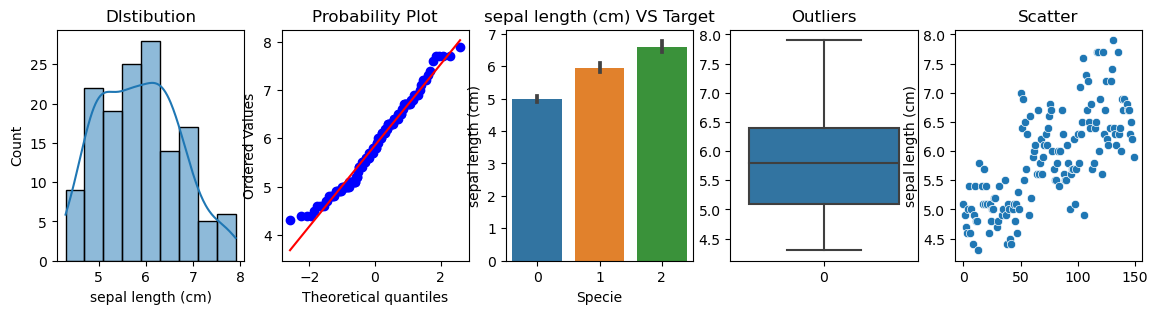

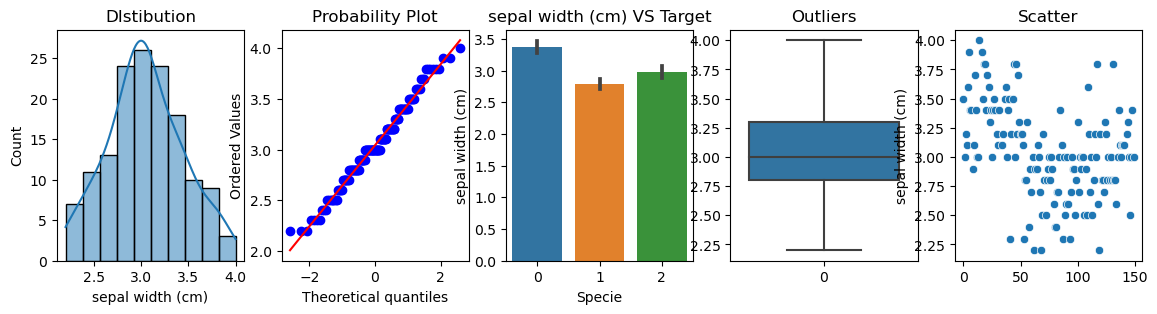

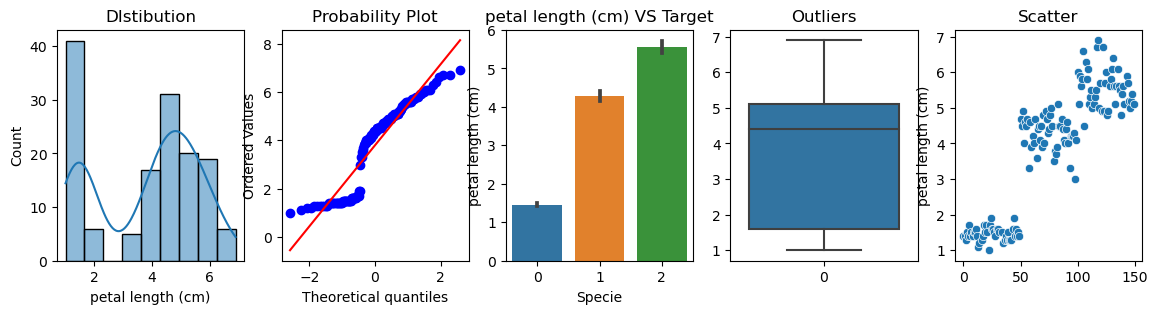

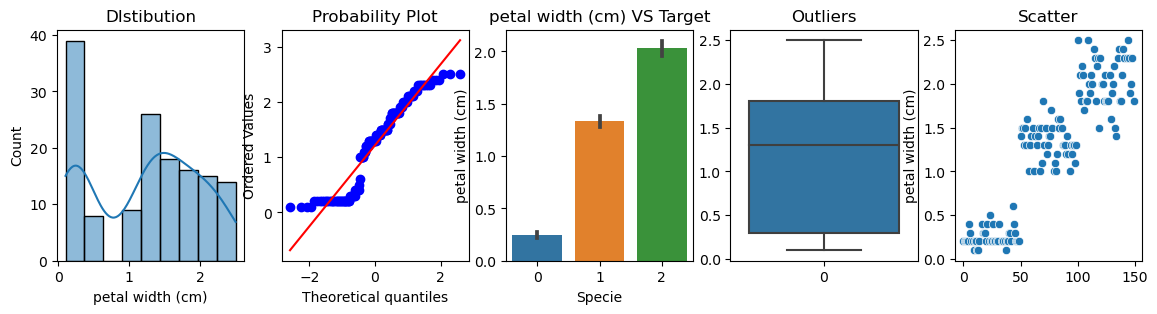

In [17]:
for i in data.columns:
    if i =='Specie':
        pass
    else:
        plt.figure(figsize=(14,3))
        plt.subplot(1,5,1)
        plt.title("DIstibution")
        sns.histplot(new_data[i],kde=True)
        plt.subplot(1,5,2)
        plt.title("DIstibution")
        st.probplot(new_data[i],dist='norm',plot=pylab)
        plt.subplot(1,5,3)
        plt.title("{} VS Target".format(i))
        sns.barplot(y=new_data[i],x=output['Specie'])
        plt.subplot(1,5,4)
        plt.title("Outliers")
        sns.boxplot(new_data[i])
        plt.subplot(1,5,5)
        plt.title("Scatter")
        sns.scatterplot(new_data[i])
        plt.show()
    

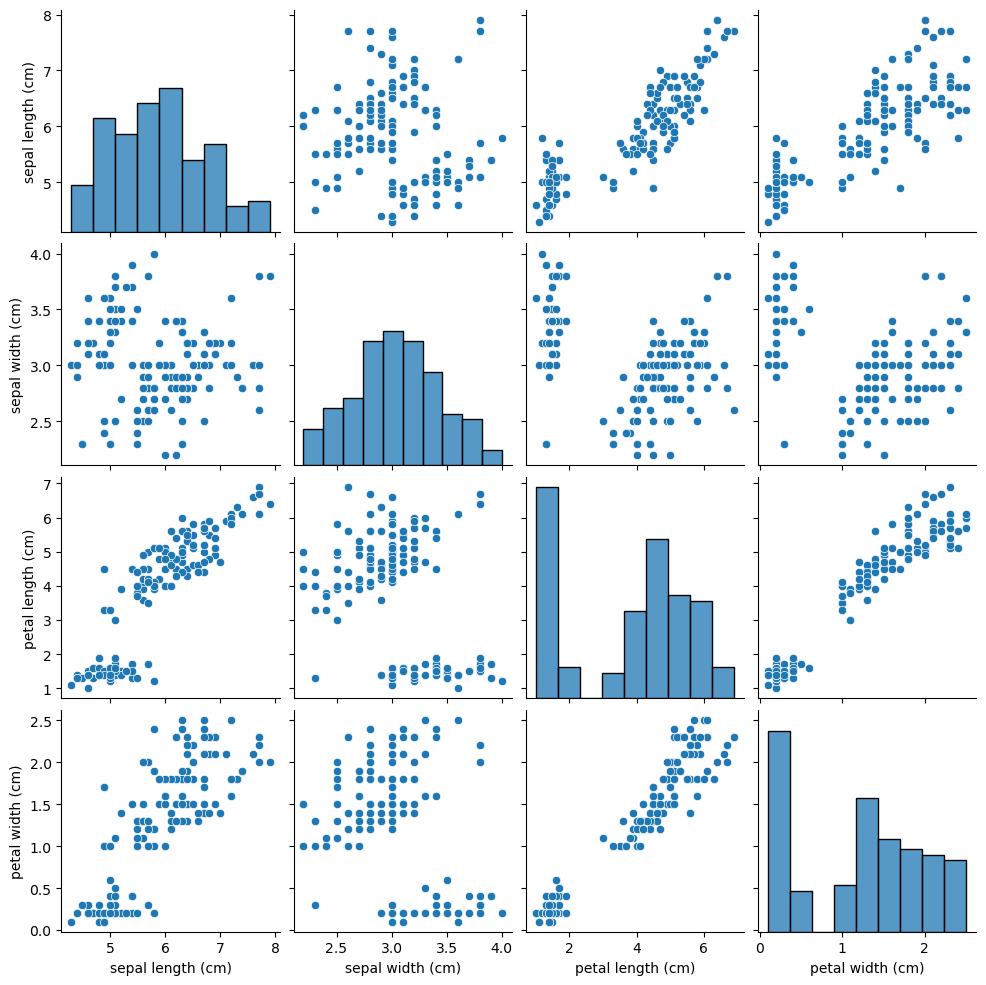

In [33]:
sns.pairplot(new_data.drop(['Specie'],axis=1))

<Axes: >

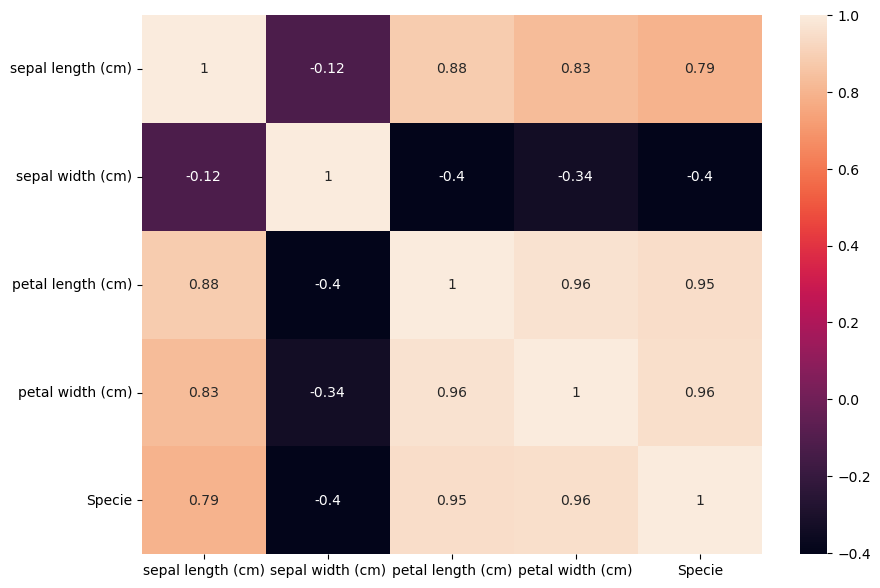

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(new_data.corr(),annot=True)

## Model Building

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.tree import RandomForestRegressor
from sklearn.metrics import r2_score,confusion_matrix,mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [207]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(data.drop(['Specie'],axis=1),data['Specie'],test_size=0.2,random_state=42)

In [208]:
scaler=MinMaxScaler()

In [217]:
X_train=scaler.fit_transform(Xtrain)
X_test=scaler.transform(Xtest)

In [218]:
Model=RandomForestRegressor(n_estimators=100)

In [219]:
Model.fit(X_train,Ytrain)

RandomForestRegressor()

In [220]:
prediction=Model.predict(X_test)

In [224]:
print("R2 Score of Model is ",r2_score(prediction,Ytest))
print("MSE of Model is ",mean_squared_error(prediction,Ytest))

R2 Score of Model is  0.997866020157095
MSE of Model is  0.0014466666666666692


In [253]:
Model.predict([[0.5,4,0.6,0.4]])

array([1.])

In [245]:
load_iris()['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')